# Exploring parameters

#### density plots, post predictive checks etc.

In [32]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

#work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

#os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
print(torch.__version__)

1.11.0


In [34]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [35]:
window_len = 30

if num_params == 6:
    
    prior_min_fix = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max_fix = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]

    prior_min = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]
    #true_params = torch.tensor([[26.61, 63.53,  137.12]])
    true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])

    

if num_params == 25:
    prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 13.3,    # prox1 weights
                 0, 0, 0, 0, 0, 0, 51.980,            # distal weights
                 0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights


    # ampa, nmda [0.927, 0.160, 2.093, 0.0519,        1.0, 1.0, 1.0, 1.0, 35.9,
    #           0.0394, 0.000042, 0.039372,           0.854, 0.117,  0.480, 75.08,
    #            0.000018, 8.633, 0.05375, 4.104,     1.0, 1.0, 1.0, 1.0, 162.110]

    prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
                 0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08,
                 0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977,
                                 0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08,
                                 0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])
    
if num_params == 17:
    
    prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
    prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [36]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [37]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

#work_dir = '/home/ubuntu/'

#os.chdir(work_dir)



import os

print(os.getcwd())



/home/ubuntu/results


In [59]:
file = '10000sims_17params_20_04_nsf_threshold_lower_std'
#file = 'multi_round_10000_17params_nsf_threshold_2104_001_std'


print(os.getcwd())

os.chdir('/home/ubuntu/results')


print(os.getcwd())
  

posterior = torch.load('{}/posterior.pt'.format(file))

obs_real = torch.load('{}/obs_real.pt'.format(file))



/home/ubuntu/results
/home/ubuntu/results


In [60]:
obs_real_stat = posterior.default_x

In [61]:

samples = posterior.sample((1000,), not_within_prior=True)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

acceptance rate:  1.0


In [11]:
samples_t_100 = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

acceptance rate:  1.0


In [54]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [55]:
##better limits:

list_min = torch.min(samples, 0)[0]
list_max = torch.max(samples, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.3

print(diff)

list_min = list(torch.nn.functional.relu(list_min - diff))
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([-1.7264e-01, -9.0975e-02, -1.2980e+00, -3.6641e-01, -9.8616e-02,
         2.2932e+01, -3.6923e-05, -2.6007e-02, -8.8711e-03, -6.3882e-02,
        -5.4813e-02,  5.4623e+01, -4.1551e+00, -1.7182e+00, -3.1493e-01,
        -1.0992e-01,  1.1045e+02])
tensor([1.1892e+00, 2.8118e-01, 3.7098e+00, 1.0629e+00, 2.9951e-02, 3.1606e+01,
        8.1665e-05, 7.0095e-02, 2.9812e-02, 3.0436e-01, 1.9121e-01, 6.7474e+01,
        1.4803e+01, 6.0056e+00, 1.4951e+00, 1.1131e+00, 1.4622e+02])
tensor([4.0855e-01, 1.1165e-01, 1.5024e+00, 4.2879e-01, 3.8570e-02, 2.6022e+00,
        3.5576e-05, 2.8831e-02, 1.1605e-02, 1.1047e-01, 7.3808e-02, 3.8552e+00,
        5.6873e+00, 2.3171e+00, 5.4301e-01, 3.6691e-01, 1.0731e+01])


In [14]:
limits

[[tensor(0.), tensor(0.8129)],
 [tensor(0.), tensor(0.2780)],
 [tensor(0.), tensor(4.3357)],
 [tensor(0.), tensor(1.5478)],
 [tensor(0.), tensor(0.0621)],
 [tensor(18.9159), tensor(34.6381)],
 [tensor(0.), tensor(8.3276e-05)],
 [tensor(0.), tensor(0.0746)],
 [tensor(0.), tensor(0.0284)],
 [tensor(0.), tensor(0.8686)],
 [tensor(0.), tensor(0.2484)],
 [tensor(49.3810), tensor(68.6833)],
 [tensor(0.), tensor(16.6726)],
 [tensor(0.), tensor(7.7356)],
 [tensor(0.), tensor(1.9066)],
 [tensor(0.), tensor(1.9863)],
 [tensor(80.2968), tensor(182.6288)]]

In [15]:
#limits = [list(tup ) for tup in zip(prior_min, prior_max)]

parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

In [56]:
true_params_threshold = torch.tensor([0.08831, 0.01525, 0.19934, 0, 0, 26.61, 
                                     0.000007, 0.006562, 0.004317, 0.080074, 0.019482, 63.53,
                                     1.43884, 0.684013, 0, 0, 137.12])

<Figure size 432x288 with 0 Axes>

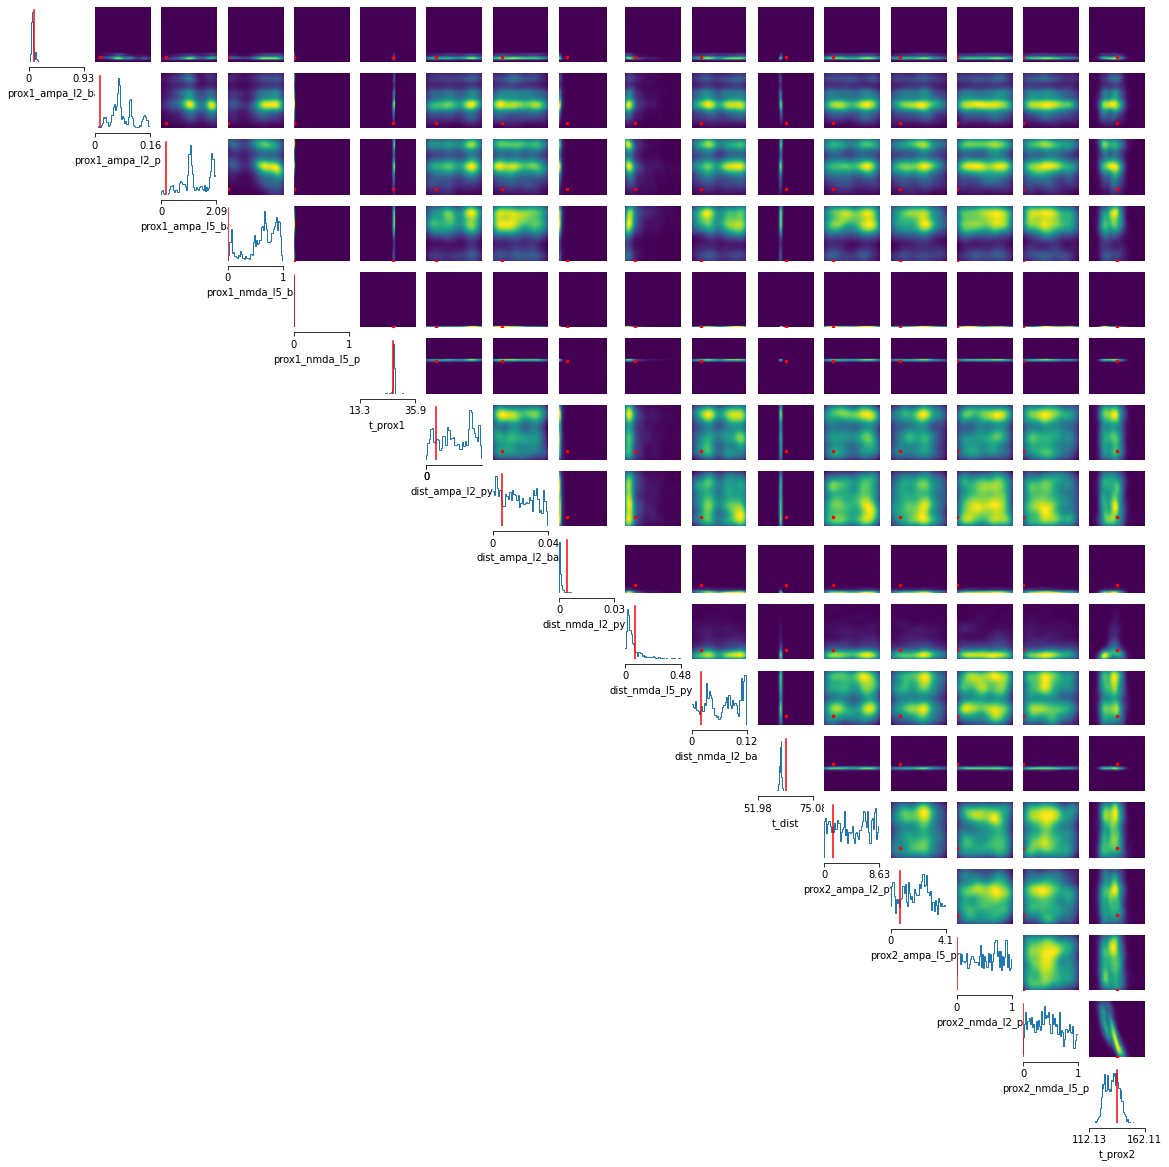

In [62]:
limits = [list(tup) for tup in zip(prior_min, prior_max)]


plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    upper = 'kde',
    lower='kde',
    #subset=[5, 11, 16],
    ticks=np.round(limits,2),
    figsize=(20, 20),
    points=true_params_threshold,
    points_offdiag={"markersize": 5},
    points_colors="r",
    labels=parameter_names,
)



#for i in range(5):
#    axes[i][i].xaxis.label.set_color('magenta')
#for i in range(5, 12):
#    axes[i][i].xaxis.label.set_color('navy')
#for i in range(12, 17):
#    axes[i][i].xaxis.label.set_color('deeppink')

<Figure size 432x288 with 0 Axes>

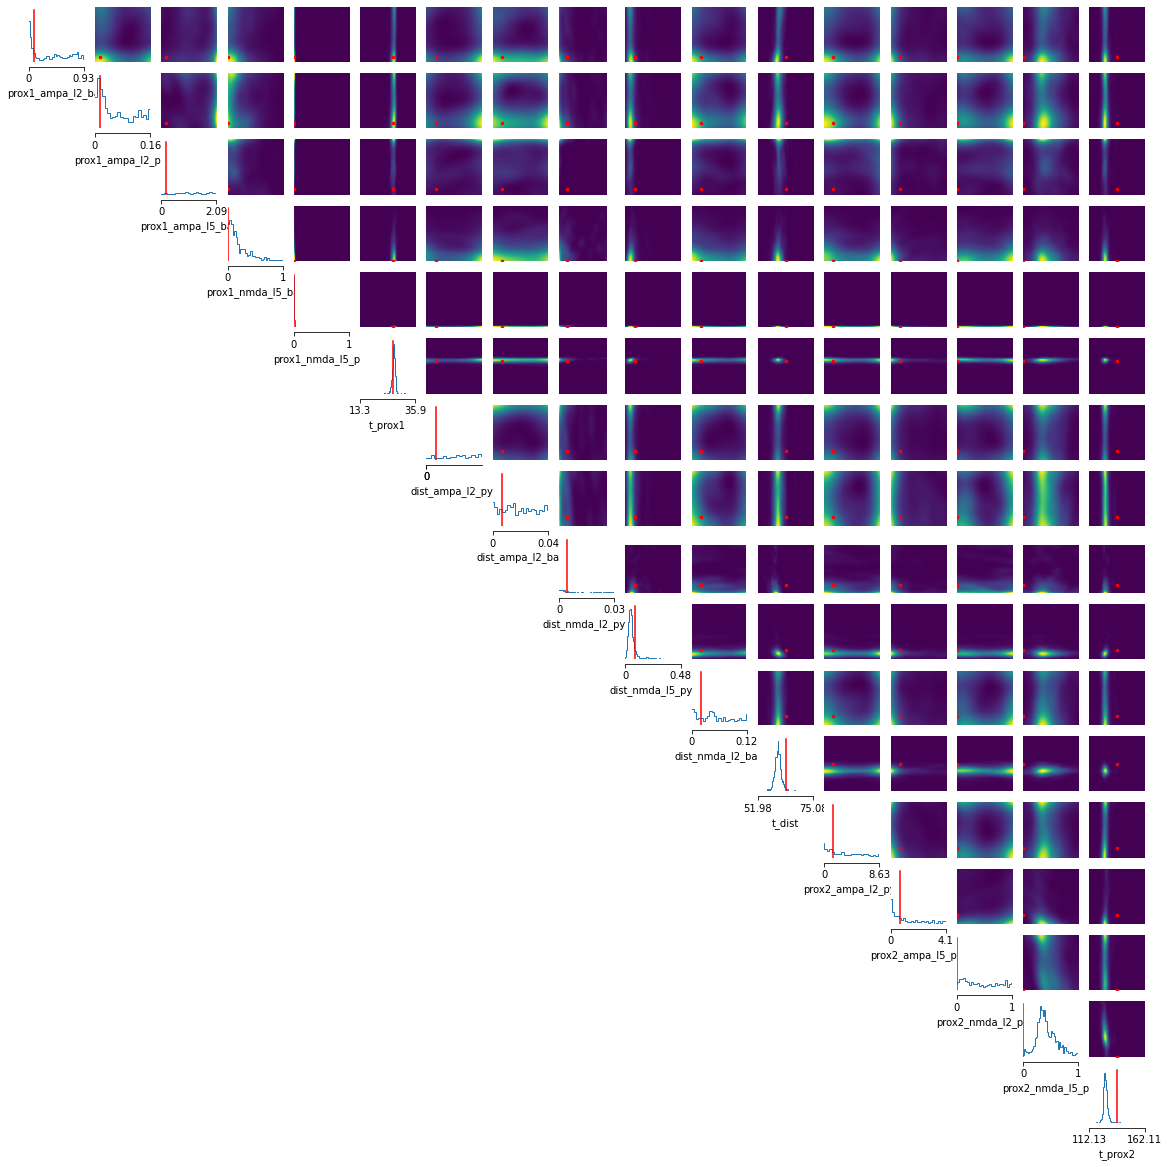

In [58]:
limits = [list(tup) for tup in zip(prior_min, prior_max)]


plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    upper = 'kde',
    lower='kde',
    #subset=[5, 11, 16],
    ticks=np.round(limits,2),
    figsize=(20, 20),
    points=true_params_threshold,
    points_offdiag={"markersize": 5},
    points_colors="r",
    labels=parameter_names,
)



#for i in range(5):
#    axes[i][i].xaxis.label.set_color('magenta')
#for i in range(5, 12):
#    axes[i][i].xaxis.label.set_color('navy')
#for i in range(12, 17):
#    axes[i][i].xaxis.label.set_color('deeppink')

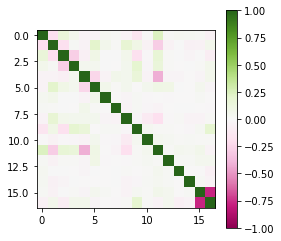

In [18]:
corr_matrix_marginal = np.corrcoef(samples.T)
fig, ax = plt.subplots(1,1, figsize=(4, 4))
im = plt.imshow(corr_matrix_marginal, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

In [19]:
cond_coeff_mat_list = []

for i in range(5):
    condition = posterior.sample((1,))
    cond_coeff_mat = conditional_corrcoeff(
        density=posterior,
        condition=condition,
        limits=torch.tensor([[-2., 2.]]*17),
    )
    cond_coeff_mat_list.append(cond_coeff_mat)
    
    

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

acceptance rate:  1.0
acceptance rate:  1.0


/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755861072/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

acceptance rate:  1.0


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

acceptance rate:  1.0


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

acceptance rate:  1.0


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

acceptance rate:  1.0


In [20]:
len(cond_coeff_mat_list[1])

17

In [21]:
    
cond_coeff_mat_tensor = torch.stack(cond_coeff_mat_list, dim=0)

In [22]:
cond_coeff_mat_tensor.shape

torch.Size([5, 17, 17])

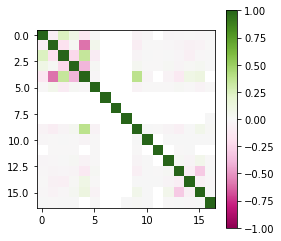

In [23]:
#take average:
cond_coeff_mat_av = torch.mean(cond_coeff_mat_tensor, dim=0)

fig, ax = plt.subplots(1,1, figsize=(4,4))
im = plt.imshow(cond_coeff_mat_av, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

In [24]:
cond_coeff_mat

tensor([[ 1.0000e+00, -1.3097e-01,  1.4117e-01,  7.1195e-02, -3.1984e-01,
          4.1067e-02,         nan,         inf,         inf, -6.4258e-03,
         -5.2651e-04,  1.5104e-03, -1.3313e-02, -1.6014e-02, -1.5755e-02,
         -1.6486e-02, -9.1607e-04],
        [-1.3097e-01,  1.0000e+00, -2.5495e-01,  1.2579e-01, -9.1215e-01,
          2.2209e-01,         nan,        -inf,         inf, -1.8427e-01,
          5.3912e-03, -2.6635e-02,  1.8015e-02, -6.5367e-02, -1.6494e-01,
          8.8977e-02, -1.3851e-03],
        [ 1.4117e-01, -2.5495e-01,  1.0000e+00, -3.2134e-01,  7.9215e-01,
         -4.6486e-01,         nan,        -inf,         nan,  6.4253e-03,
          8.3216e-04, -3.0302e-02, -4.9164e-03, -8.6456e-02, -7.8470e-02,
          5.0228e-03,  1.0592e-02],
        [ 7.1195e-02,  1.2579e-01, -3.2134e-01,  1.0000e+00, -7.7505e-01,
          2.7787e-02,         nan,         nan,  4.5412e-02,  3.9282e-02,
          9.7962e-03, -1.0022e-02,  3.8304e-03, -4.8832e-02, -1.5575e-02,
    

In [40]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

true_params_supra = torch.tensor([0.08831, 0.01525,  0.19934, 0, 0, 26.61, 0, 0, 0, 0, 0, 63.53,
                                 1.43884, 0.684013, 0, 0, 137.12])

In [38]:
file = '10000sims_17params_11_04_nsf_supra_ratio'

file = '10000sims_17params_20_04_nsf_supra_lower_std'

file = '10000sims_17params_20_04_nsf_supra_001_std'

#thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))


obs_real2 = torch.load('{}/obs_real.pt'.format(file))

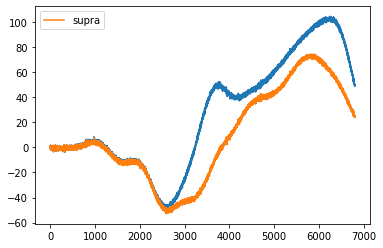

In [27]:
plt.plot(obs_real)
plt.plot(obs_real2, label = 'supra')
plt.legend()

In [39]:
samples_supra = posterior.sample((1000,))

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

acceptance rate:  1.0


In [41]:
true_params_supra

tensor([8.8310e-02, 1.5250e-02, 1.9934e-01, 0.0000e+00, 0.0000e+00, 2.6610e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.3530e+01,
        1.4388e+00, 6.8401e-01, 0.0000e+00, 0.0000e+00, 1.3712e+02])

In [30]:
list_max3.values

NameError: name 'list_max3' is not defined

In [44]:
##better limits:

list_min = torch.min(samples_supra, 0)[0]
list_max = torch.max(samples_supra, 0)[0]


print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.02

print(diff)

list_min = list(list_min - diff)
list_max = list(list_max + diff)

tensor([-2.3149e-02,  7.5661e-03,  7.8369e-01, -2.2307e-01, -1.6131e-03,
         2.6899e+01, -4.6367e-07,  5.5607e-04, -2.6404e-03,  1.2160e-02,
        -3.2913e-02,  5.8465e+01,  1.5226e-01, -3.8436e-02,  1.2310e-02,
         8.5138e-03,  1.2298e+02])
tensor([9.0416e-01, 4.5829e-02, 1.9898e+00, 5.5688e-01, 3.9305e-03, 2.9558e+01,
        4.0873e-05, 4.3116e-02, 1.1847e-03, 1.8042e-01, 1.5497e-01, 6.0367e+01,
        8.8392e+00, 4.2708e+00, 1.0056e+00, 4.4126e-01, 1.3352e+02])
tensor([1.8546e-02, 7.6526e-04, 2.4123e-02, 1.5599e-02, 1.1087e-04, 5.3189e-02,
        8.2674e-07, 8.5120e-04, 7.6503e-05, 3.3653e-03, 3.7577e-03, 3.8045e-02,
        1.7374e-01, 8.6184e-02, 1.9865e-02, 8.6549e-03, 2.1085e-01])


In [46]:
list_max2 = torch.cat((true_params_supra.unsqueeze(0), torch.tensor(list_max).unsqueeze(0)), dim=0) 
list_max3 = torch.max(list_max2, 0)

list_min2 = torch.cat((true_params_supra.unsqueeze(0), torch.tensor(list_min).unsqueeze(0)), dim=0) 
list_min3 = torch.min(list_min2, 0)

In [47]:
limits = [list(tup) for tup in zip(list_min3.values, list_max3.values)]

In [48]:
limits

[[tensor(-0.0417), tensor(0.9227)],
 [tensor(0.0068), tensor(0.0466)],
 [tensor(0.1993), tensor(2.0140)],
 [tensor(-0.2387), tensor(0.5725)],
 [tensor(-0.0017), tensor(0.0040)],
 [tensor(26.6100), tensor(29.6115)],
 [tensor(-1.2904e-06), tensor(4.1700e-05)],
 [tensor(-0.0003), tensor(0.0440)],
 [tensor(-0.0027), tensor(0.0013)],
 [tensor(0.), tensor(0.1838)],
 [tensor(-0.0367), tensor(0.1587)],
 [tensor(58.4268), tensor(63.5300)],
 [tensor(-0.0215), tensor(9.0130)],
 [tensor(-0.1246), tensor(4.3570)],
 [tensor(-0.0076), tensor(1.0254)],
 [tensor(-0.0001), tensor(0.4499)],
 [tensor(122.7681), tensor(137.1200)]]

<Figure size 432x288 with 0 Axes>

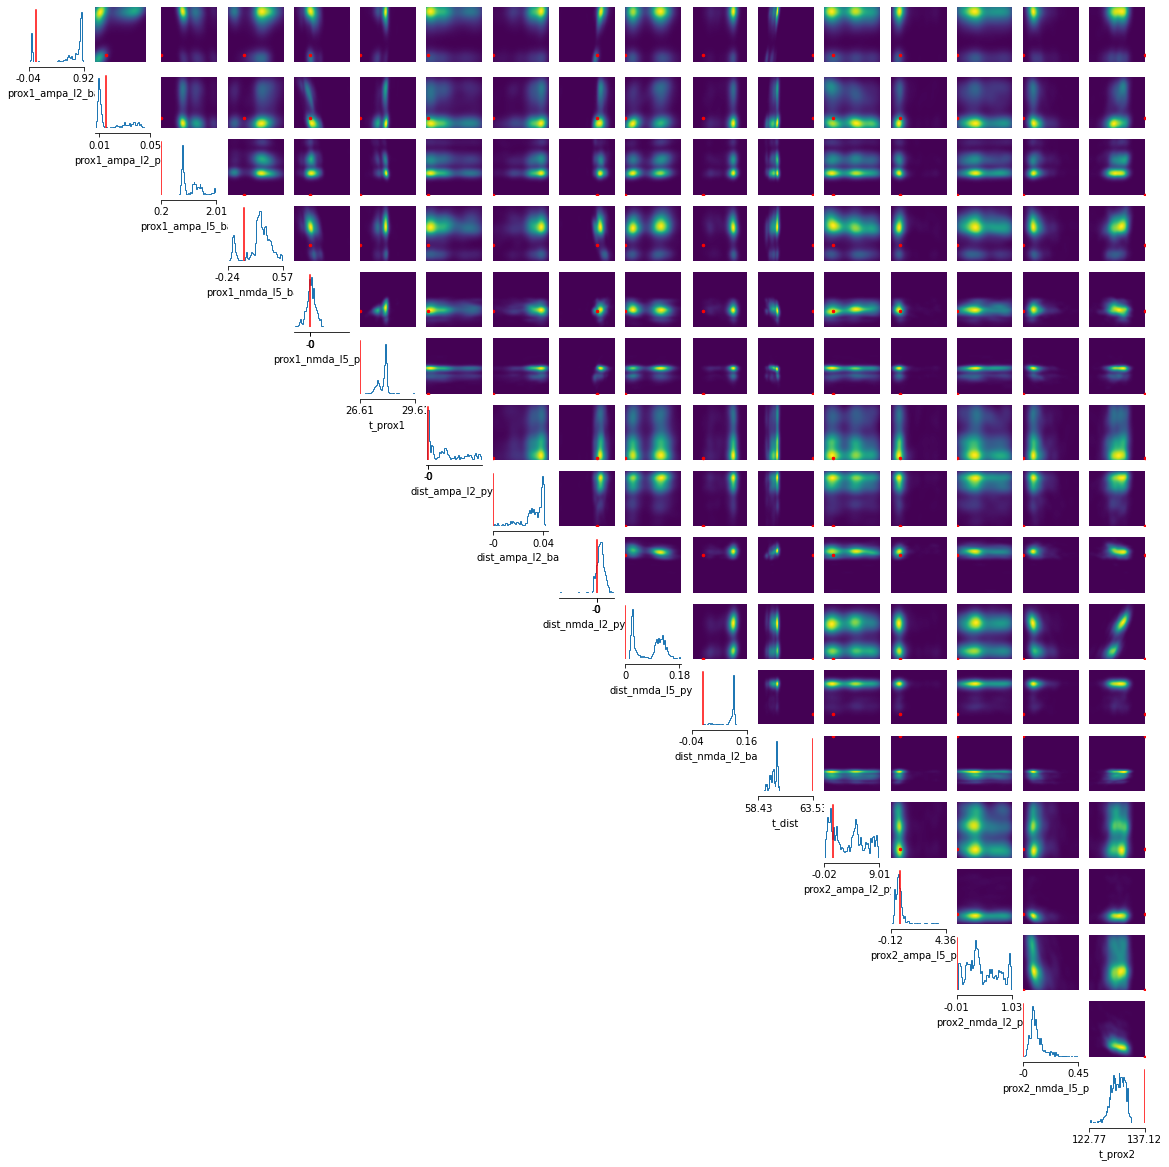

In [49]:
plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples_supra,
    limits=limits,
    upper = 'kde',
    lower='kde',
    #subset=[5, 11, 16],
    ticks=np.round(limits,2),
    figsize=(20, 20),
    points=true_params_supra,
    points_offdiag={"markersize": 5},
    points_colors="r",
    labels=parameter_names,
)

